<a href="https://colab.research.google.com/github/ShefaliShettyy/DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)


(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [ ]:
#label are 0 to 10
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [ ]:
#convert 2D to 1D
#when you dont want to change the 1 dimention u write -1
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])


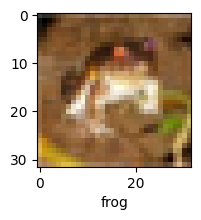

In [ ]:
plot_sample(X_train,  y_train, 0)

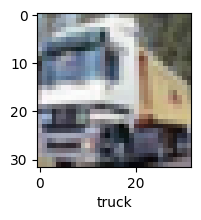

In [ ]:
plot_sample(X_train,  y_train, 1)

In [ ]:
#whenever you have a image you want to divide each pixcel with 255 to normalize it
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#ANN
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 131s 83ms/step - loss: 1.8101 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.6210 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.5390 - accuracy: 0.4573
Epoch 4/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.4799 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4306 - accuracy: 0.4967


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.58      0.55      1000
           1       0.72      0.40      0.51      1000
           2       0.48      0.17      0.26      1000
           3       0.39      0.22      0.28      1000
           4       0.49      0.30      0.37      1000
           5       0.36      0.45      0.40      1000
           6       0.37      0.77      0.50      1000
           7       0.62      0.49      0.54      1000
           8       0.52      0.71      0.60      1000
           9       0.49      0.65      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [ ]:
#Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5057 - accuracy: 0.4551
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1422 - accuracy: 0.5971
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0051 - accuracy: 0.6495
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9175 - accuracy: 0.6796
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8502 - accuracy: 0.7029
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7961 - accuracy: 0.7223
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7518 - accuracy: 0.7380
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7057 - accuracy: 0.7544
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6699 - accuracy: 0.7687
Epoch 10/10
1563/1563 [==============================] - 71s 45m

In [ ]:
#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy.
# Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features
#in cnn it will fig the filter  by itslef

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.68      0.72      1000
           1       0.77      0.85      0.81      1000
           2       0.63      0.59      0.61      1000
           3       0.52      0.44      0.48      1000
           4       0.70      0.59      0.64      1000
           5       0.59      0.67      0.63      1000
           6       0.72      0.83      0.77      1000
           7       0.80      0.72      0.76      1000
           8       0.66      0.89      0.76      1000
           9       0.83      0.69      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9312 - accuracy: 0.6950


[0.9312357306480408, 0.6949999928474426]

In [ ]:
y_test[:5] #shoukd be 1D array

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1, )
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

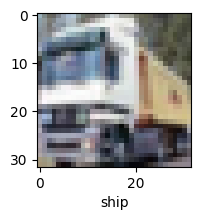

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
y_pred[:5] #its difficult to find max value so we use argmax

array([[1.0425757e-03, 7.5930235e-05, 2.9823843e-03, 9.1148013e-01,
        5.0805946e-04, 1.8867852e-02, 9.6877227e-03, 1.7858700e-04,
        5.4554582e-02, 6.2219100e-04],
       [4.5419650e-04, 1.0732003e-01, 3.4220641e-06, 4.5368304e-07,
        8.8500052e-08, 1.7856084e-09, 2.2740574e-08, 4.0456190e-08,
        8.8993287e-01, 2.2888989e-03],
       [2.8858405e-02, 2.1709488e-03, 2.6336085e-04, 2.6156791e-04,
        1.8275898e-03, 7.5046983e-06, 2.3194492e-05, 2.6169168e-03,
        9.6223998e-01, 1.7304930e-03],
       [9.4596791e-01, 1.2961645e-03, 3.0025546e-03, 9.1418606e-04,
        1.1108908e-03, 8.2435508e-06, 1.4516822e-05, 3.5618068e-04,
        4.7225758e-02, 1.0357964e-04],
       [2.4715864e-06, 1.3875227e-06, 7.5574773e-03, 6.2295403e-03,
        1.6167454e-01, 5.4594181e-03, 8.1904471e-01, 2.4213682e-07,
        2.9562105e-05, 5.7244330e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)